In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df=pd.read_csv('sms.csv',sep='\t',names=['Status','Message'])


In [ ]:
df.head()

,Status,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
len(df)

5572

In [ ]:
len(df[df.Status=='spam'])

747

In [ ]:
len(df[df.Status=='ham'])

4825

In [ ]:
df.loc[df["Status"]=='ham',"Status"]=1
df.loc[df["Status"]=='spam',"Status"]=0

In [ ]:
df.head()

,Status,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df_x=df["Message"]
df_y=df["Status"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)

In [ ]:
cv=TfidfVectorizer(min_df=1,stop_words='english')
x_traincv=cv.fit_transform(x_train)
a=x_traincv.toarray()
a[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
x_testcv=cv.transform(x_test)
x_testcv.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
mnb=MultinomialNB()
y_train=y_train.astype('int')
mnb.fit(x_traincv,y_train)

MultinomialNB()

In [ ]:
prediction=mnb.predict(x_testcv)

In [ ]:
prediction

array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
testmessage=x_test.iloc[0]
testmessage

'somewhere out there beneath the pale moon light someone think in of u some where out there where dreams come true... goodnite &amp; sweet dreams'

In [ ]:
a=np.array(y_test)
a = a.astype('int') # Convert to integer type

In [ ]:
count=0
for i in range (len(prediction)):
    if prediction[i]==a[i]:
        count=count+1


In [ ]:
count

1068

In [ ]:
len(prediction)

1115

In [ ]:
accuracy = count / len(prediction)
print(f"Accuracy: {accuracy}")

Accuracy: 0.957847533632287


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(a, prediction))
print(confusion_matrix(a, prediction))

              precision    recall  f1-score   support

           0       0.99      0.73      0.84       168
           1       0.95      1.00      0.98       947

    accuracy                           0.96      1115
   macro avg       0.97      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115

[[122  46]
 [  1 946]]


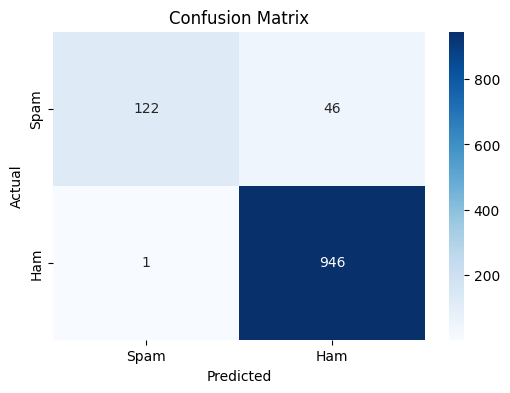

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(a, prediction)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Create a directory for the streamlit application

### Subtask:
Create a new directory to store the Streamlit application script.


**Reasoning**:
Create a new directory named `spam_detector_app` to store the Streamlit application script and verify its creation.



In [ ]:
import os

# Define the directory name
app_dir = 'spam_detector_app'

# Create the directory
os.makedirs(app_dir, exist_ok=True)

# Verify that the directory has been created
if os.path.exists(app_dir) and os.path.isdir(app_dir):
    print(f"Directory '{app_dir}' created successfully.")
else:
    print(f"Failed to create directory '{app_dir}'.")

Directory 'spam_detector_app' created successfully.


## Create a streamlit application script

### Subtask:
Write a Python script that loads the model and vectorizer, creates a text input field for the user to enter a message, and displays the prediction (Spam or Ham) when the user submits the message. Save this script in the newly created directory.


**Reasoning**:
Write the Python script for the Streamlit application, including loading the model and vectorizer, creating input fields, and displaying predictions.



In [ ]:
%%writefile spam_detector_app/app.py
import streamlit as st
import pickle
import os

# Get the directory of the current script
script_dir = os.path.dirname(__file__)
# Construct the absolute paths to the pickle files
vectorizer_path = os.path.join(script_dir, '../vectorizer.pkl')
model_path = os.path.join(script_dir, '../spam_model.pkl')

# Load the saved vectorizer and model
with open(vectorizer_path, 'rb') as vectorizer_file:
    cv = pickle.load(vectorizer_file)

with open(model_path, 'rb') as model_file:
    mnb = pickle.load(model_file)

# Create a Streamlit title
st.title('SMS Spam Detection')

# Add a text input area
user_input = st.text_area("Enter an SMS message:")

# Add a button to submit the message
if st.button("Predict"):
    if user_input:
        # Transform the user's input message
        user_input_transformed = cv.transform([user_input])

        # Make a prediction
        prediction = mnb.predict(user_input_transformed)

        # Display the prediction
        if prediction[0] == 1:
            st.write("Prediction: Ham")
        else:
            st.write("Prediction: Spam")
    else:
        st.write("Please enter a message to predict.")


Writing spam_detector_app/app.py


## Run the streamlit application

### Subtask:
Provide instructions on how to run the Streamlit script from the command line, making sure to navigate to the directory where the script is saved.


In [ ]:
# Example custom message
custom_message = "Congratulations! You've won a free prize. Click here to claim."

# Transform the custom message using the fitted vectorizer
custom_message_transformed = cv.transform([custom_message])

# Make a prediction using the trained model
prediction = mnb.predict(custom_message_transformed)

# Display the prediction
if prediction[0] == 1:
    print("The message is predicted as: Ham")
else:
    print("The message is predicted as: Spam")

The message is predicted as: Spam


In [ ]:
df['Message_Length'] = df['Message'].apply(len)

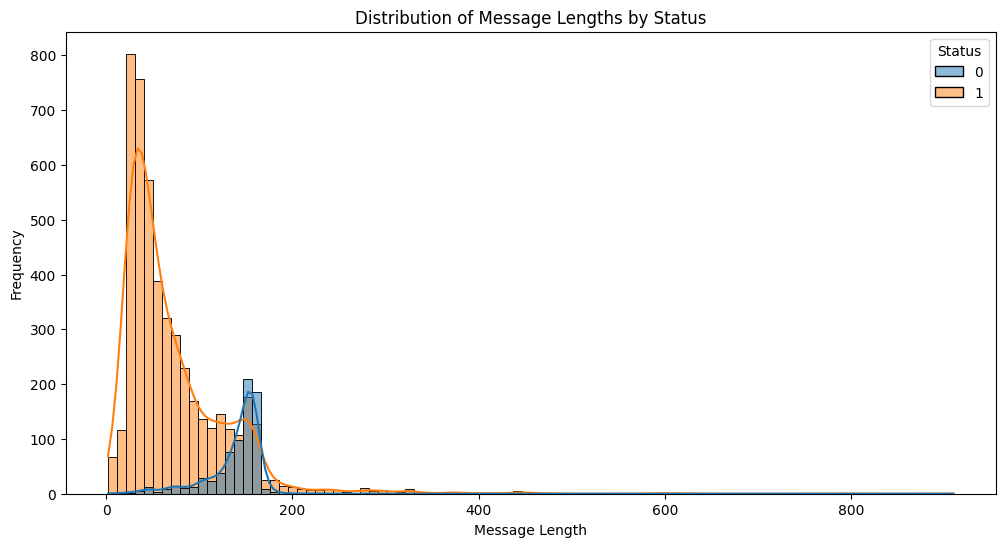

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Message_Length', hue='Status', kde=True)
plt.title('Distribution of Message Lengths by Status')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()